In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

In [2]:
#Import Packages
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
data=pd.read_csv("F:\\Prescriptive Analytics and Advanced ML\\mnist_test.csv")
print(data.shape)
print(data.columns)

(10000, 785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)


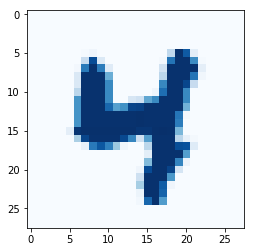

In [5]:
sample_row = 2001 #Some row picked
sample_row = data.iloc[sample_row,:-1] #We skip the last column because it's the label of the data
transformed_row = sample_row.values.reshape(28,28) # reshape to 28*28

#Now plot the image with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(transformed_row,cmap= "Blues")
plt.show();

In [6]:
train = data.sample(2000, random_state=1, replace=False)
train.head()
test = data.sample(2000, random_state=2,replace=False)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
9953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
5437,0,0,0,0,0,0,0,0,0,0,...,231,24,0,0,0,0,0,0,0,7


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
7878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [7]:
train.groupby('label').size()
test.groupby('label').size()

label
0    192
1    225
2    220
3    205
4    219
5    177
6    177
7    230
8    158
9    197
dtype: int64

label
0    208
1    226
2    209
3    206
4    183
5    164
6    221
7    192
8    176
9    215
dtype: int64

In [8]:
x_train = train.drop(['label'],axis=1,inplace=False)# Store pixel values in x
y_train = train['label']                            # Store the label in y

In [9]:
x_test = test.drop(['label'], axis=1, inplace=False) # Store pixel values in x
y_test = test['label']                               # Store the label in y

In [10]:
n_estimators = [10,500,1000,2000]
criterion = ['gini','entropy']
min_samples_split = [2,10,20,50,100]
max_depth =[20,30,40,50,None]

In [12]:
param_grid = {'n_estimators':n_estimators,
              'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}
rf = RandomForestClassifier()
rf_g = RandomizedSearchCV(rf,param_grid,cv=5,verbose=2,n_jobs=-1)
rf_g.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 500, 1000, 2000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50, 100], 'max_depth': [20, 30, 40, 50, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [13]:
rf_g.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
rf_g.best_score_

0.9315

In [15]:
rf_g.best_index_

6

In [16]:
cv = pd.DataFrame(rf_g.cv_results_)

In [17]:
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.498247,0.265909,0.112492,0.006249,500,50,40,entropy,"{'n_estimators': 500, 'min_samples_split': 50,...",0.868486,...,0.8820,0.011232,7,0.953037,0.951158,0.948782,0.954432,0.946974,0.950877,0.002720
1,0.187489,0.009880,0.009373,0.007653,10,2,50,gini,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.878412,...,0.8600,0.015095,8,1.000000,0.998748,0.999375,1.000000,0.998129,0.999250,0.000728
2,7.367159,0.062565,0.196861,0.007654,1000,100,None,gini,"{'n_estimators': 1000, 'min_samples_split': 10...",0.838710,...,0.8500,0.010012,9,0.902317,0.887289,0.892567,0.901998,0.893325,0.895499,0.005821
3,5.660516,0.041733,0.115616,0.007654,500,20,None,gini,"{'n_estimators': 500, 'min_samples_split': 20,...",0.903226,...,0.9190,0.016642,3,0.988729,0.989355,0.991880,0.993134,0.990019,0.990623,0.001640
4,7.786951,0.102024,0.103118,0.012499,500,100,40,entropy,"{'n_estimators': 500, 'min_samples_split': 100...",0.833747,...,0.8405,0.011802,10,0.891046,0.882279,0.881949,0.892010,0.887711,0.886999,0.004237
5,22.410921,0.348604,0.224985,0.015932,1000,20,20,entropy,"{'n_estimators': 1000, 'min_samples_split': 20...",0.913151,...,0.9170,0.013759,4,0.986224,0.988103,0.988757,0.990012,0.985652,0.987750,0.001612
6,26.144330,0.358536,0.259357,0.028977,1000,2,40,entropy,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.923077,...,0.9315,0.020493,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,11.075431,0.092691,0.103118,0.007655,500,20,20,entropy,"{'n_estimators': 500, 'min_samples_split': 20,...",0.893300,...,0.9135,0.020261,6,0.986224,0.988729,0.986259,0.987516,0.986900,0.987125,0.000931
8,25.511640,2.240728,0.240607,0.070980,1000,20,40,entropy,"{'n_estimators': 1000, 'min_samples_split': 20...",0.908189,...,0.9160,0.016765,5,0.986850,0.987477,0.985634,0.988140,0.984404,0.986501,0.001335
9,6.187065,0.077177,0.128115,0.006250,500,10,None,gini,"{'n_estimators': 500, 'min_samples_split': 10,...",0.910670,...,0.9265,0.019448,2,0.998748,1.000000,0.998126,0.998752,1.000000,0.999125,0.000750


In [18]:
predicted=rf_g.predict(x_test)

In [19]:
predicted.shape

(2000,)

In [20]:
metrics.accuracy_score(predicted,y_test)

0.937

In [21]:
print(metrics.classification_report(predicted,y_test))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       218
          1       0.98      0.95      0.97       234
          2       0.90      0.93      0.92       203
          3       0.93      0.91      0.92       210
          4       0.97      0.90      0.93       197
          5       0.90      0.96      0.93       153
          6       0.95      0.94      0.94       223
          7       0.94      0.93      0.94       194
          8       0.89      0.97      0.93       161
          9       0.92      0.95      0.93       207

avg / total       0.94      0.94      0.94      2000



Confusion Matrix


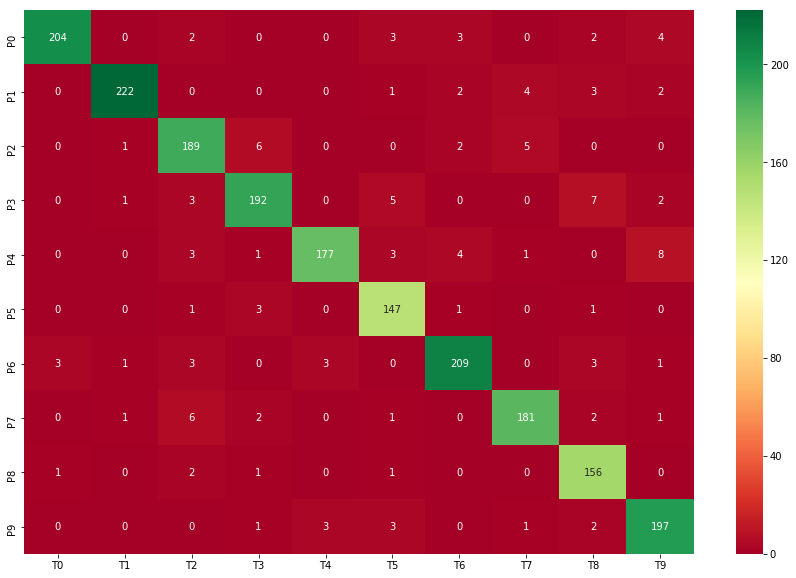

In [23]:
#Confusion Matrix
plt.figure(figsize=(15,10))
print('Confusion Matrix')
cf=metrics.confusion_matrix(predicted,y_test)
lbl1=["T0","T1","T2","T3","T4","T5","T6","T7","T8","T9"]
lbl2=["P0","P1","P2","P3","P4","P5","P6","P7","P8","P9"]
sns.heatmap(cf,annot=True,cmap="RdYlGn",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();